In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import os
import json

Extract values from file

In [10]:
data = {}

i = 1    
for filename in os.listdir("./"):
    if filename.endswith(".json"):  # Adjust for file format
        filepath = os.path.join("./", filename)
        with open(filepath, "r") as file:
            json_object = json.load(file)
            projects = [{"project_id": key, **value} for key, value in json_object.items()]
            for project in projects:
                match = re.search(r"(\d+)\s+BR001", project["bumpy_analysis"])
                if match:
                    score = int(match.group(1))
                    project_id = project["project_id"]
                    if project_id not in data:
                        data[project_id] = {}
                    milestone = "Milestone " + str(i)
                    data[project_id][milestone] = score
        i += 1

print(data)


{993: {'Milestone 1': 36, 'Milestone 28': 75, 'Milestone 53': 95}, 989: {'Milestone 2': 37, 'Milestone 29': 45, 'Milestone 54': 46}, 899: {'Milestone 3': 14, 'Milestone 30': 14, 'Milestone 55': 55}, 898: {'Milestone 4': 15, 'Milestone 31': 15, 'Milestone 56': 46}, 897: {'Milestone 5': 1, 'Milestone 32': 1, 'Milestone 57': 1}, 842: {'Milestone 6': 16, 'Milestone 33': 27, 'Milestone 58': 28}, 1004: {'Milestone 7': 10, 'Milestone 34': 44, 'Milestone 59': 45}, 1002: {'Milestone 8': 4, 'Milestone 35': 22, 'Milestone 60': 22}, 922: {'Milestone 9': 12, 'Milestone 36': 35, 'Milestone 61': 38}, 854: {'Milestone 10': 24, 'Milestone 37': 75, 'Milestone 62': 75}, 858: {'Milestone 11': 15, 'Milestone 38': 53, 'Milestone 63': 63}, 857: {'Milestone 12': 17, 'Milestone 39': 42, 'Milestone 64': 41}, 947: {'Milestone 13': 12, 'Milestone 40': 46, 'Milestone 65': 49}, 971: {'Milestone 14': 17, 'Milestone 41': 17}, 967: {'Milestone 15': 15, 'Milestone 42': 15}, 936: {'Milestone 16': 23}, 935: {'Milestone 1

Convert data

In [4]:
df = pd.DataFrame.from_dict(data, orient='index')
df = df.sort_index()

# Plot data
## Bar chart

<Figure size 1000x500 with 0 Axes>

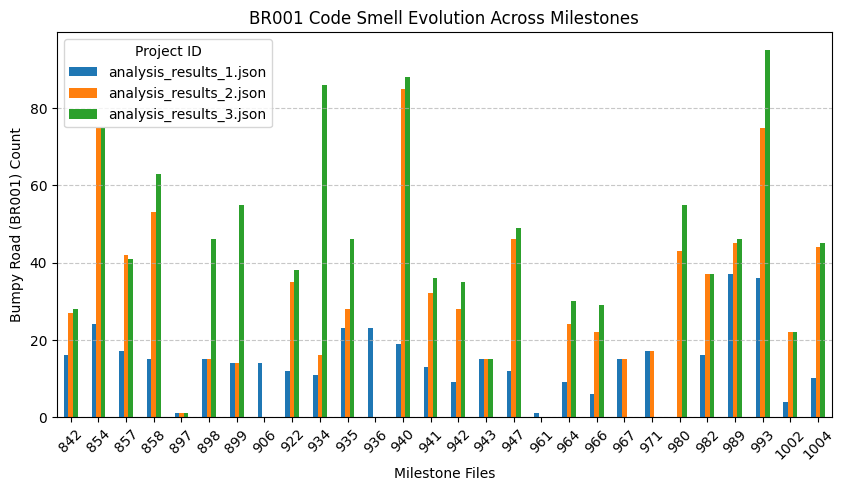

In [5]:
# Plot
plt.figure(figsize=(10, 5))
df.plot(kind='bar', figsize=(10, 5))

# Labels and Title
plt.xlabel("Projects")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("BR001 Code Smell Evolution Across Milestones")
plt.legend(title="Milestones")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Line chart

<Figure size 1200x600 with 0 Axes>

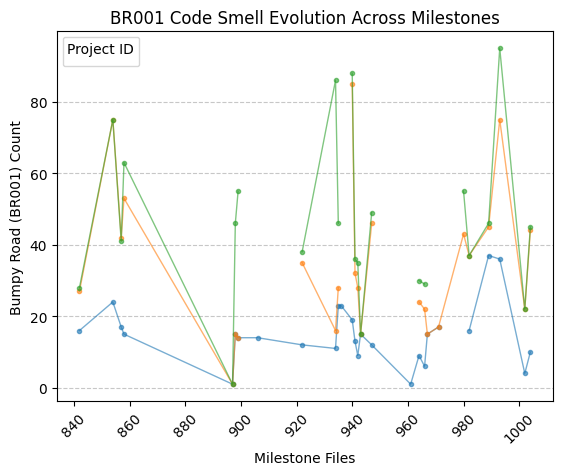

In [6]:
# Plot
plt.figure(figsize=(12, 6))
df.plot(kind='line', alpha=0.6, marker='o', markersize=3, linewidth=1)

# Labels and Title
plt.xlabel("Milestone Files")
plt.ylabel("Bumpy Road (BR001) Count")
plt.title("BR001 Code Smell Evolution Across Milestones")
plt.xticks(rotation=45)
plt.legend([], title="Project ID", loc="upper left", fontsize="small")  # Hide legend for too many projects
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## Heatmap

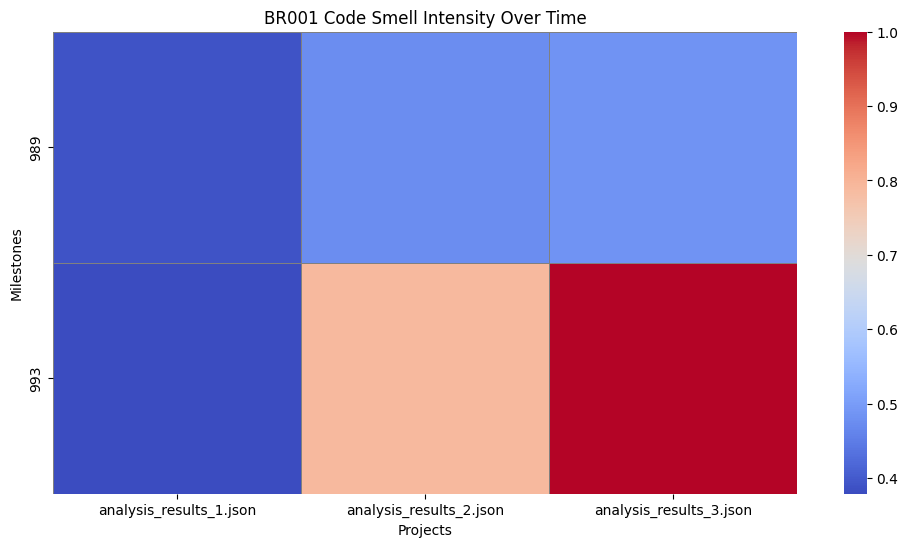

In [6]:
# Normalize values to improve visualization
df_normalized = df / df.max().max()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_normalized, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels
plt.xlabel("Projects")
plt.ylabel("Milestones")
plt.title("BR001 Code Smell Intensity Over Time")

# Show plot
plt.show()